# Sharing pretrained models (PyTorch)

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [1]:
%%capture
!pip install datasets evaluate transformers[sentencepiece]
!apt install git-lfs
!pip install transformers[torch] -U
!pip install accelerate -U

You will need to setup git, adapt your email and name in the following cell.

In [2]:
!git config --global user.email "mskehoe001@gmail.com"
!git config --global user.name "Matthew Kehoe"

In the steps below, we'll take a look at the easiest ways to share pretrained models to the 🤗 Hub. There are tools and utilities available that make it simple to share and update models directly on the Hub, which we will explore below.

We encourage all users that train models to contribute by sharing them with the community — sharing models, even when trained on very specific datasets, will help others, saving them time and compute resources and providing access to useful trained artifacts. In turn, you can benefit from the work that others have done!

There are three ways to go about creating new model repositories:

- Using the `push_to_hub` API
- Using the `huggingface_hub` Python library
- Using the web interface

Once you've created a repository, you can upload files to it via git and git-lfs. We'll walk you through creating model repositories and uploading files to them in the following sections.

### Using the push_to_hub API

The simplest way to upload files to the Hub is by leveraging the `push_to_hub` API.

Before going further, you'll need to generate an authentication token so that the `huggingface_hub` API knows who you are and what namespaces you have write access to. Make sure you are in an environment where you have transformers installed (see [Setup](https://huggingface.co/course/chapter0)). If you are in a notebook, you can use the following function to login:

In [3]:
from huggingface_hub import notebook_login

notebook_login()

You should be prompted for your username and password, which are the same ones you use to log in to the Hub. If you do not have a Hub profile yet, you should create one [here](https://huggingface.co/join).

Great! You now have your authentication token stored in your cache folder. Let's create some repositories!

If you have played around with the Trainer API to train a model, the easiest way to upload it to the Hub is to set `push_to_hub=True` when you define your TrainingArguments:

In [4]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    "bert-finetuned-mrpc", save_strategy="epoch", push_to_hub=True
)

When you call `trainer.train()`, the Trainer will then upload your model to the Hub each time it is saved (here every epoch) in a repository in your namespace. That repository will be named like the output directory you picked (here `bert-finetuned-mrpc`) but you can choose a different name with `hub_model_id = "a_different_name"`.

To upload your model to an organization you are a member of, just pass it with `hub_model_id = "my_organization/my_repo_name"`.

Once your training is finished, you should do a final `trainer.push_to_hub()` to upload the last version of your model. It will also generate a model card with all the relevant metadata, reporting the hyperparameters used and the evaluation results! Here is an example of the content you might find in a such a model card:

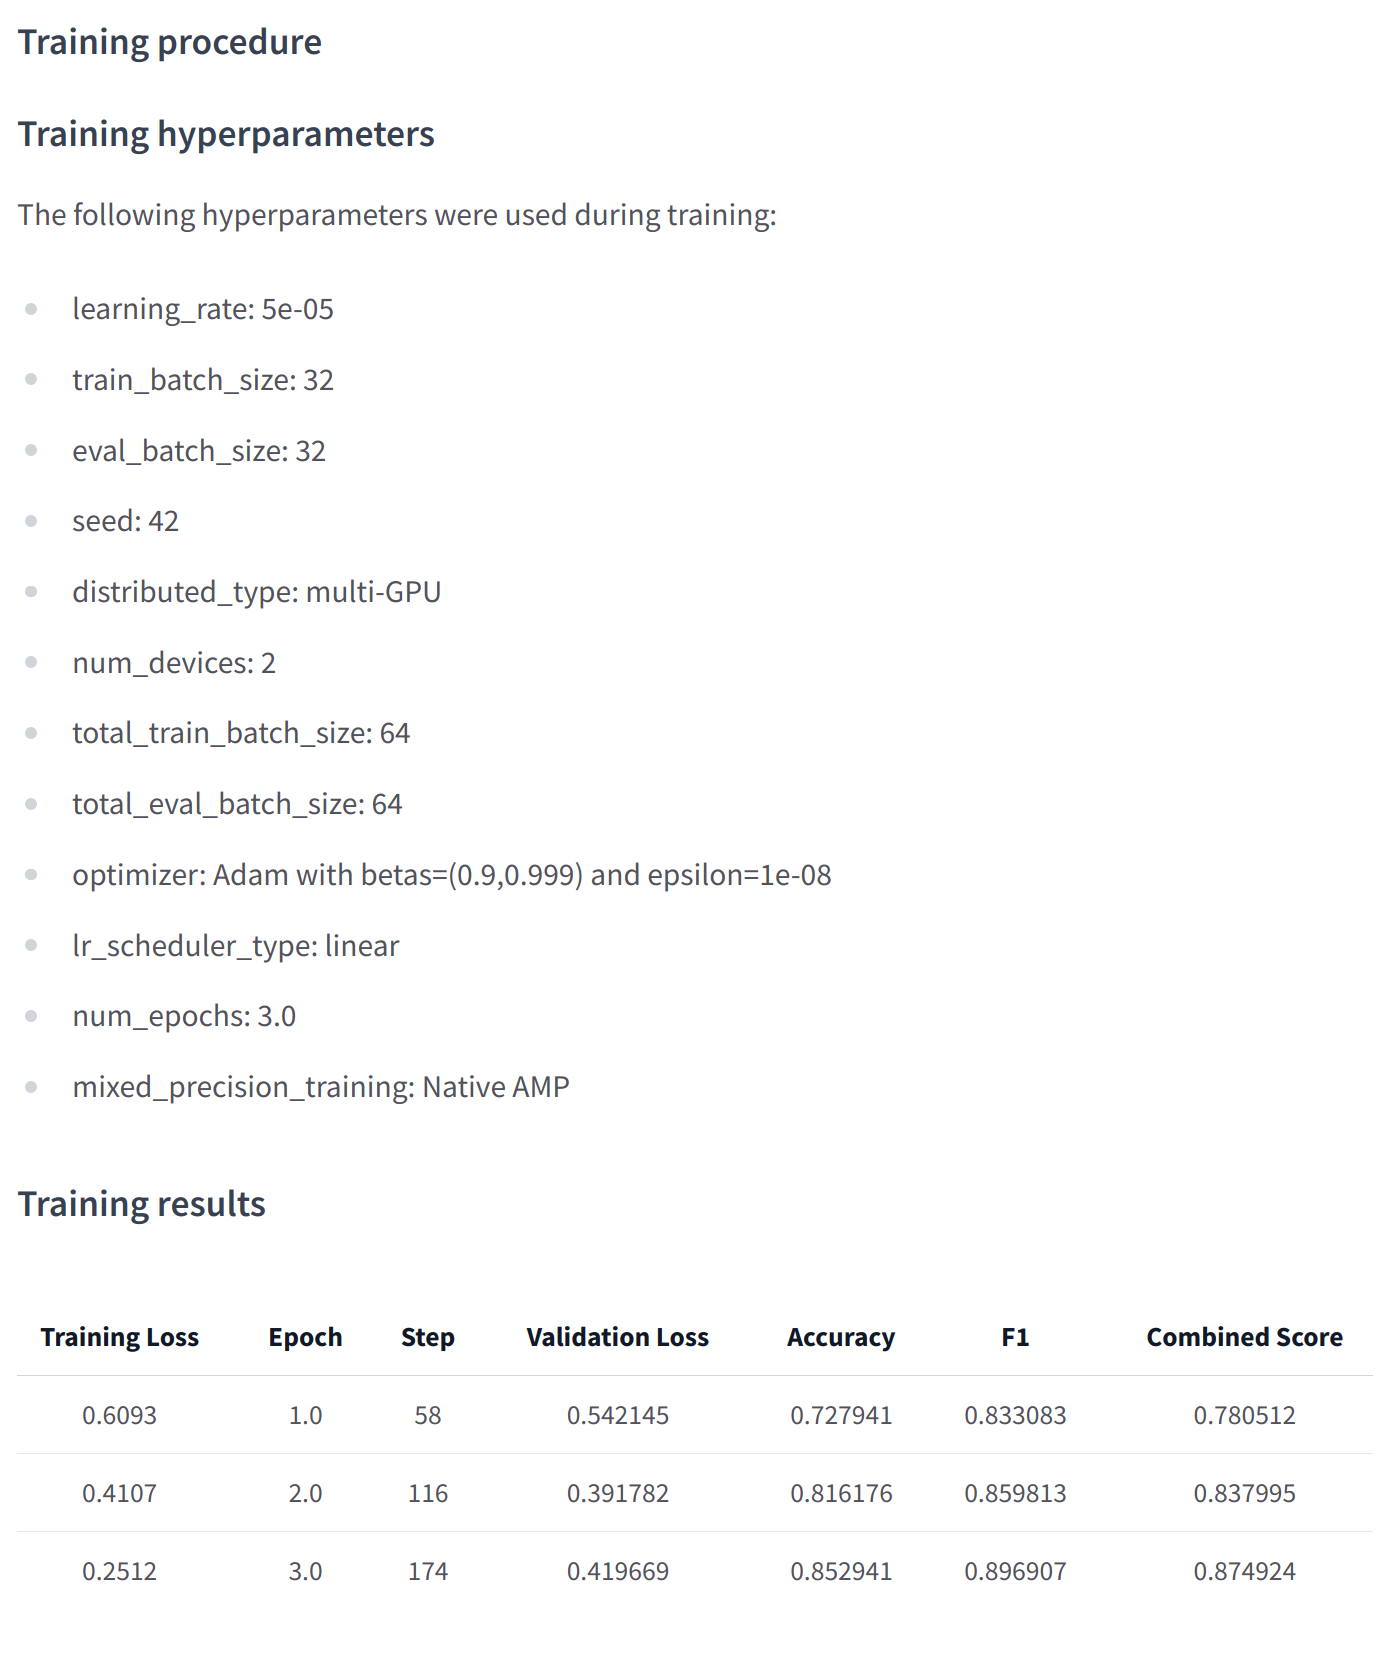

At a lower level, accessing the Model Hub can be done directly on models, tokenizers, and configuration objects via their `push_to_hub()` method. This method takes care of both the repository creation and pushing the model and tokenizer files directly to the repository. No manual handling is required, unlike with the API we'll see below.

To get an idea of how it works, let's first initialize a model and a tokenizer:

In [5]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

checkpoint = "camembert-base"

model = AutoModelForMaskedLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

You're free to do whatever you want with these — add tokens to the tokenizer, train the model, fine-tune it. Once you're happy with the resulting model, weights, and tokenizer, you can leverage the `push_to_hub()` method directly available on the model object:

In [6]:
model.push_to_hub("dummy-model")

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Axion004/dummy-model/commit/93ceec14b7ef8098f79e7d4045e54efb49428399', commit_message='Upload CamembertForMaskedLM', commit_description='', oid='93ceec14b7ef8098f79e7d4045e54efb49428399', pr_url=None, pr_revision=None, pr_num=None)

This will create the new repository `dummy-model` in your profile, and populate it with your model files. Do the same with the tokenizer, so that all the files are now available in this repository:

In [7]:
tokenizer.push_to_hub("dummy-model")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Axion004/dummy-model/commit/93e236f43ee9d72567bff0dae4ab33b942aac78f', commit_message='Upload tokenizer', commit_description='', oid='93e236f43ee9d72567bff0dae4ab33b942aac78f', pr_url=None, pr_revision=None, pr_num=None)

If you belong to an organization, simply specify the `organization` argument to upload to that organization's namespace:

In [9]:
#tokenizer.push_to_hub("dummy-model", organization="huggingface")

If you wish to use a specific Hugging Face token, you're free to specify it to the `push_to_hub()` method as well:

In [14]:
#tokenizer.push_to_hub("dummy-model", use_auth_token="<TOKEN>")

Now head to the Model Hub to find your newly uploaded model: https://huggingface.co/user-or-organization/dummy-model.

Click on the “Files and versions” tab, and you should see the files visible in the following screenshot:

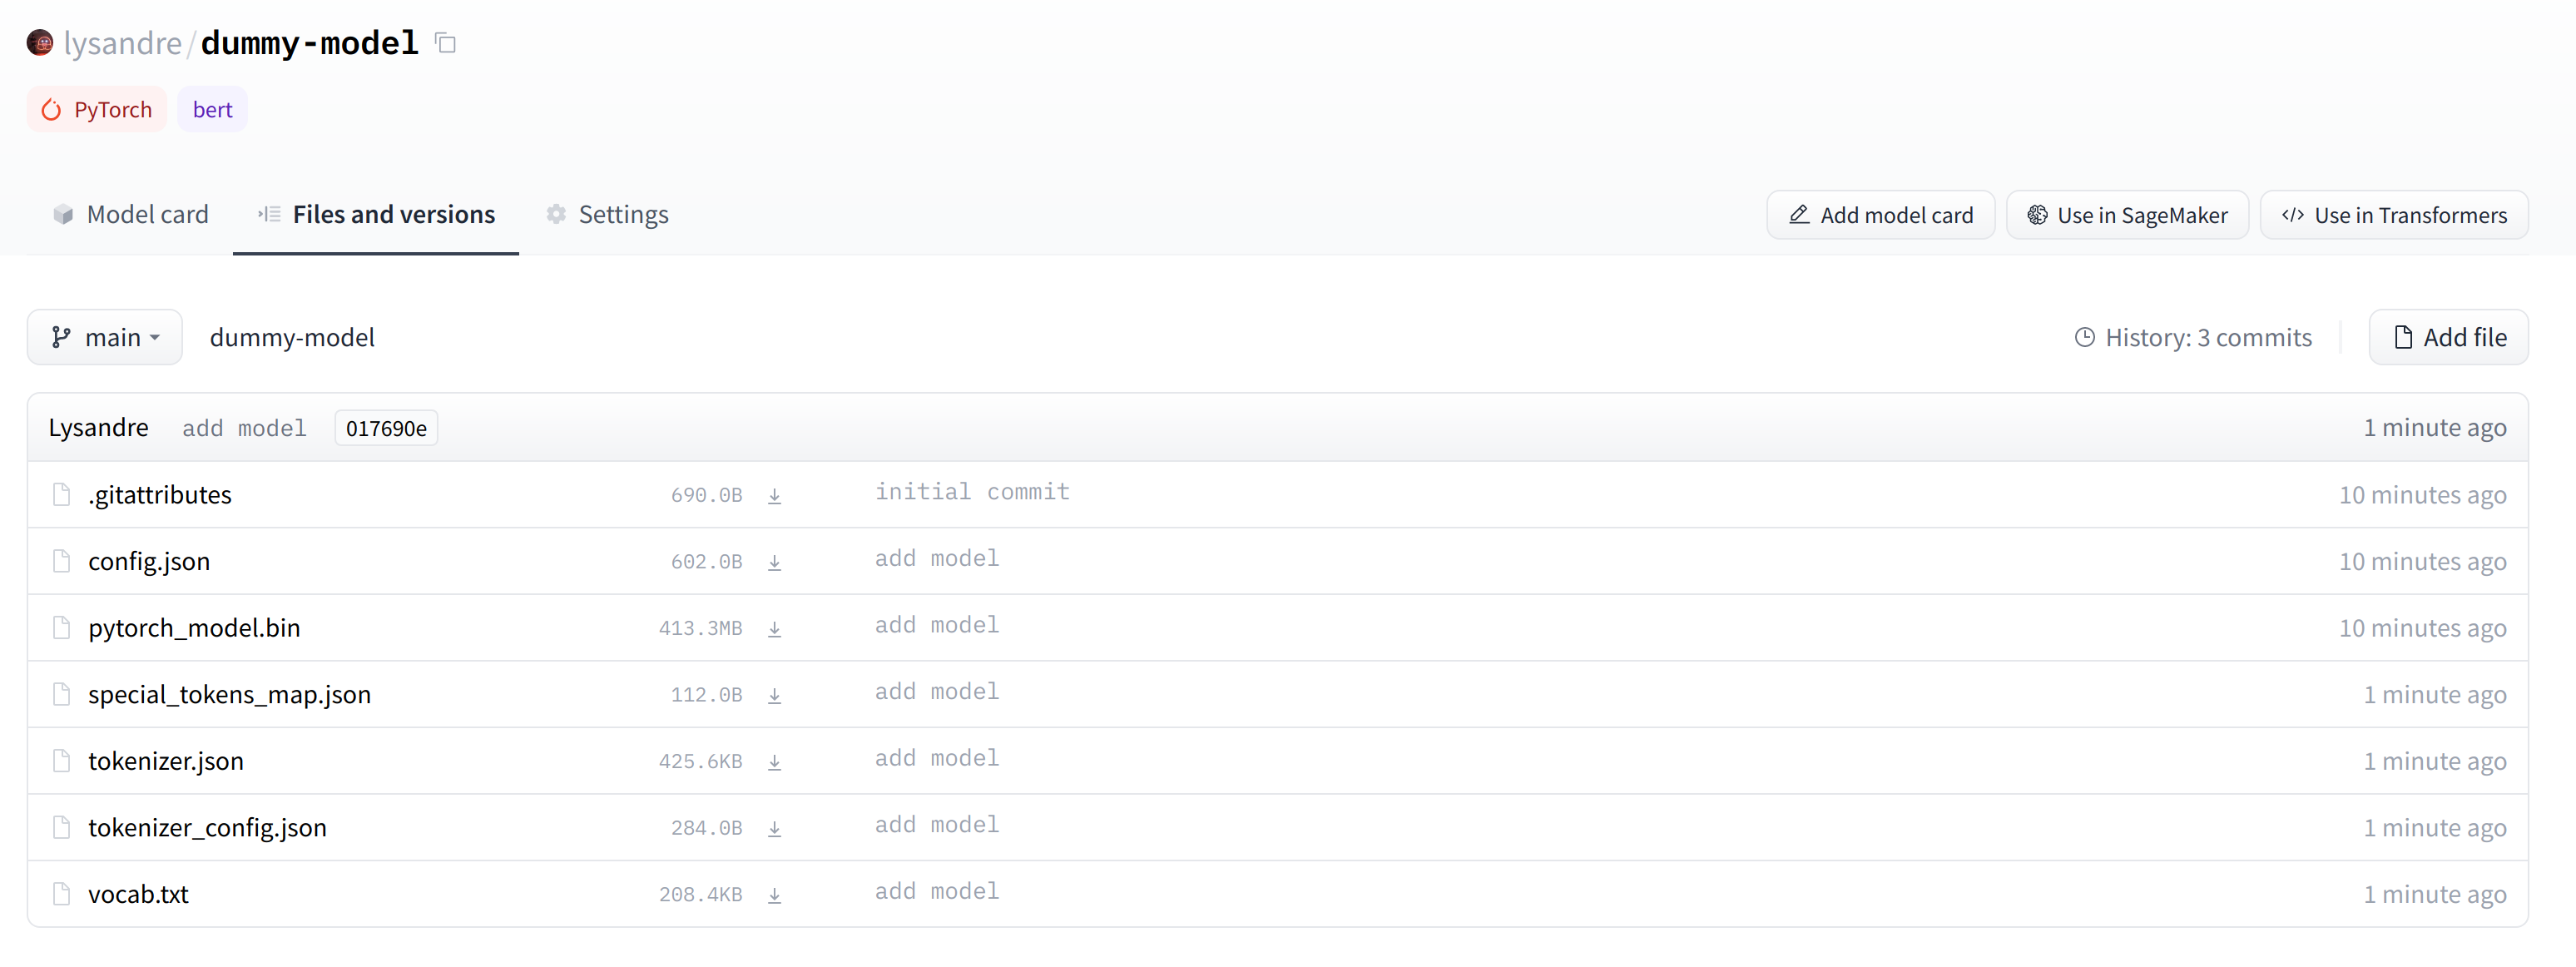

As you've seen, the `push_to_hub()` method accepts several arguments, making it possible to upload to a specific repository or organization namespace, or to use a different API token. We recommend you take a look at the method specification available directly in the [🤗 Transformers documentation](https://huggingface.co/transformers/model_sharing) to get an idea of what is possible.

The `push_to_hub()` method is backed by the [huggingface_hub](https://github.com/huggingface/huggingface_hub) Python package, which offers a direct API to the Hugging Face Hub. It’s integrated within 🤗 Transformers and several other machine learning libraries, like [allenlp](https://github.com/allenai/allennlp). Although we focus on the 🤗 Transformers integration in this chapter, integrating it into your own code or library is simple.

Jump to the last section to see how to upload files to your newly created repository!

### Using the huggingface_hub Python library

The `huggingface_hub` Python library is a package which offers a set of tools for the model and datasets hubs. It provides simple methods and classes for common tasks like getting information about repositories on the hub and managing them. It provides simple APIs that work on top of git to manage those repositories' content and to integrate the Hub in your projects and libraries.

Similarly to using the `push_to_hub` API, this will require you to have your API token saved in your cache. In order to do this, you will need to use the login command from the CLI, as mentioned in the previous section (again, make sure to prepend these commands with the ! character if running in Google Colab):

In [15]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write)

The `huggingface_hub` package offers several methods and classes which are useful for our purpose. Firstly, there are a few methods to manage repository creation, deletion, and others:

In [16]:
from huggingface_hub import (
    # User management
    login,
    logout,
    whoami,

    # Repository creation and management
    create_repo,
    delete_repo,
    update_repo_visibility,

    # And some methods to retrieve/change information about the content
    list_models,
    list_datasets,
    list_metrics,
    list_repo_files,
    upload_file,
    delete_file,
)

Additionally, it offers the very powerful `Repository` class to manage a local repository. We will explore these methods and that class in the next few section to understand how to leverage them.

The `create_repo` method can be used to create a new repository on the hub:

In [18]:
from huggingface_hub import create_repo

create_repo("dummy-model-2")

RepoUrl('https://huggingface.co/Axion004/dummy-model-2', endpoint='https://huggingface.co', repo_type='model', repo_id='Axion004/dummy-model-2')

This will create the repository `dummy-model-2` in your namespace. If you like, you can specify which organization the repository should belong to using the organization argument:

In [19]:
# from huggingface_hub import create_repo

# create_repo("dummy-model-2", organization="huggingface")

This will create the `dummy-model-2` repository in the `huggingface` namespace, assuming you belong to that organization. Other arguments which may be useful are:

- `private`, in order to specify if the repository should be visible from others or not.
- `token`, if you would like to override the token stored in your cache by a given token.
- `repo_type`, if you would like to create a `dataset` or a `space` instead of a model. Accepted values are "dataset" and "space".

Once the repository is created, we should add files to it! Jump to the next section to see the three ways this can be handled.

In [ ]:
from huggingface_hub import upload_file

upload_file(
    "<path_to_file>/config.json",
    path_in_repo="config.json",
    repo_id="<namespace>/dummy-model",
)

In [ ]:
from huggingface_hub import Repository

repo = Repository("<path_to_dummy_folder>", clone_from="<namespace>/dummy-model")

In [ ]:
repo.git_pull()
repo.git_add()
repo.git_commit()
repo.git_push()
repo.git_tag()

In [ ]:
repo.git_pull()

In [ ]:
model.save_pretrained("<path_to_dummy_folder>")
tokenizer.save_pretrained("<path_to_dummy_folder>")

In [ ]:
repo.git_add()
repo.git_commit("Add model and tokenizer files")
repo.git_push()

In [ ]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

checkpoint = "camembert-base"

model = AutoModelForMaskedLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Do whatever with the model, train it, fine-tune it...

model.save_pretrained("<path_to_dummy_folder>")
tokenizer.save_pretrained("<path_to_dummy_folder>")